# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, mean_absolute_percentage_error, auc

In [4]:
# откройте данные: ваш код здесь
data = pd.read_csv('spam_or_not_spam.csv')
data.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


In [16]:
# рассчитайте частоты для классов : ваш код здесь
counts = data['label'].value_counts() / data.shape[0] * 100
counts

0    83.333333
1    16.666667
Name: label, dtype: float64

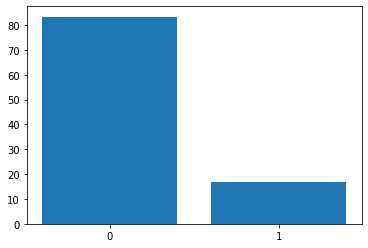

In [21]:
# визуализируйте результат: ваш код здесь
counts = {str(k):v for k,v in dict(counts).items()}
plt.bar(counts.keys(), counts.values())
plt.xticks = counts.keys();

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [67]:
#ваш код здесь
data['flag'] = data['email'].apply(lambda x: 1 if str(x) in ['None', 'nan', 'NA'] or len(x) == x.count(' ') else 0)
data = data[data['flag'] == 0].drop('flag', axis=1)

Переводим данные в векторный вид:

In [66]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [62]:
X

<2997x34116 sparse matrix of type '<class 'numpy.int64'>'
	with 348376 stored elements in Compressed Sparse Row format>

In [63]:
#ваш код здесь
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [68]:
#ваш код здесь
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [71]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [72]:
#ваш код здесь
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [74]:
#ваш код здесь
cnb_classifier = ComplementNB(alpha = 0.01)
cnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cnb_classifier.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [84]:
#ваш код здесь
# Evaluate the classifier
metrics = {
'accuracy': accuracy_score(y_test, y_pred),
'precision': precision_score(y_test, y_pred),
'recall': recall_score(y_test, y_pred),
'mape' : mean_absolute_percentage_error(y_test, y_pred)}
print(*metrics.items(), sep = '\n')

('accuracy', 0.988)
('precision', 1.0)
('recall', 0.9274193548387096)
('mape', 0.012)


Нарисуйте ROC-кривую:

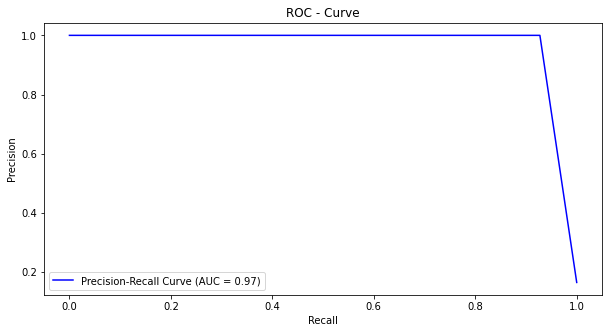

In [91]:
#ваш код здесь
precision, recall, _  = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc(recall, precision):.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('ROC - Curve')
plt.legend(loc='best')
plt.show();

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [100]:
#ваш код здесь
params = {'alpha': np.linspace(0.001, 1, 20)}
est = ComplementNB()
gs_cv = GridSearchCV(estimator=est, param_grid=params)
gs_cv.fit(X_train, y_train)

print("Best Parameters:", gs_cv.best_params_)
print("Best Accuracy:", gs_cv.best_score_)

Best Parameters: {'alpha': 0.4216315789473684}
Best Accuracy: 0.9915446671615937


`Вывод: с помощью подбора параметра альфа удалось улучшить метрику аккюраси`